## Analýza funkce náhodné proměnné
#### Původní rozdělení
Náhodná proměnná $x$ má **Normální rozdělení** $N(\mu, \sigma^2)$ s hustotou pravděpodobnosti:
$$f_X(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$

#### Výsledné rozdělení (Log-Normální)
$$f_Y(y) = \frac{1}{y \sqrt{2\pi}\sigma} \exp\left(-\frac{(\ln(y)-\mu)^2}{2\sigma^2}\right) \quad \text{pro } y > 0$$


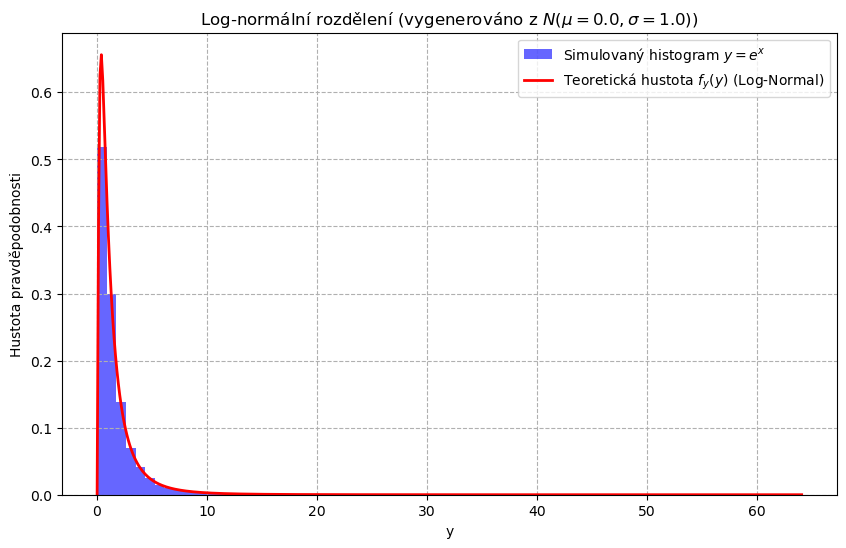

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Parametry
mu = 0.0      # Očekávaná hodnota x
sigma = 1.0   # Standardní odchylka x
N = 100000     # Počet vzorků pro simulaci

# a) Generování z Normálního rozdělení N(mu, sigma)
x_samples = np.random.normal(mu, sigma, N)

# b) Transformace: y = e^x
y_samples = np.exp(x_samples)

# 2. VÝPOČET TEORETICKÉ HUSTOTY (Log-Normal)
y_vals = np.linspace(0.01, np.max(y_samples) * 1.05, 500)

# Implementace teoretické hustoty (Log-Normal PDF)
def lognormal_pdf(y, mu, sigma):
    with np.errstate(divide='ignore'): 
        return (1 / (y * sigma * np.sqrt(2 * np.pi))) * \
               np.exp(-((np.log(y) - mu)**2) / (2 * sigma**2))

pdf_vals = lognormal_pdf(y_vals, mu, sigma)

# 3. VYKRESLENÍ A POROVNÁNÍ
plt.figure(figsize=(10, 6))
plt.hist(y_samples, bins=70, density=True, alpha=0.6, color='blue', label='Simulovaný histogram $y=e^x$')
plt.plot(y_vals, pdf_vals, color='red', linewidth=2, label='Teoretická hustota $f_y(y)$ (Log-Normal)')
plt.title(rf'Log-normální rozdělení (vygenerováno z $N(\mu={mu}, \sigma={sigma})$)')
plt.xlabel('y')
plt.ylabel('Hustota pravděpodobnosti')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()